In [ ]:
import os
import scipy.ndimage
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
import cv2
import PIL
from PIL import Image
from matplotlib import image as plt_image


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Changing directory and listing files

In [ ]:

# Get the current directory (the directory where your Python script is located)
current_directory = os.getcwd()
print(current_directory)

# Specify the path to the directory you want to change to
folder_path = "/content/drive/MyDrive/Colab Notebooks/415ASG1/Photos"


# Change the current working directory to 5the new directory
os.chdir(folder_path)

# Get the current directory (the directory where your Python script is located)
current_directory = os.getcwd()
print(current_directory)

files = os.listdir(current_directory)

# Print the list of files
for file in files:
    print(file)



/content
/content/drive/MyDrive/Colab Notebooks/415ASG1/Photos
1.jpg
2.jpg
3.jpg
4.jpg
5.jpg
6.jpg


# Changing File Names

In [ ]:

# Check if the folder path exists
if os.path.exists(folder_path):
    # List all files in the folder
    files = os.listdir(folder_path)
    ind = 1

    # Enumerate through the files and rename them
    for index, file in enumerate(files):
        # Generate the new file name with enumeration
        new_name = f"{ind}.jpg"
        ind+=1
        # Build the full paths for the old and new names
        old_path = os.path.join(folder_path, file)
        new_path = os.path.join(folder_path, new_name)

        # Rename the file
        os.rename(old_path, new_path)

        print(f"Renamed: {file} -> {new_name}")

else:
    print(f"The folder path '{folder_path}' does not exist.")


Renamed: 1.jpg -> 1.jpg
Renamed: 2.jpg -> 2.jpg
Renamed: 3.jpg -> 3.jpg
Renamed: 4.jpg -> 4.jpg
Renamed: 5.jpg -> 5.jpg
Renamed: 6.jpg -> 6.jpg


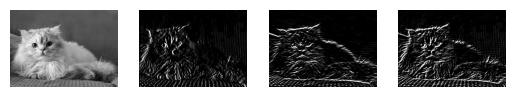

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Provide the absolute path to your image file
image_path = '4.jpg'

# Read the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
# Define a 3x3 kernel
kernel = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])
kernel2 = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])
kernel3 = kernel + kernel2

# Perform convolution using cv2.filter2D
result = cv2.filter2D(image, -1, kernel)
r1 = cv2.filter2D(image, -1, kernel2)
r2 = cv2.filter2D(image, -1, kernel3)


# Display the original image and the result using matplotlib
plt.subplot(1, 4, 1), plt.imshow(image, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 2), plt.imshow(result, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 3), plt.imshow(r1, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 4), plt.imshow(r2, cmap='gray')
plt.axis("off")
plt.show()


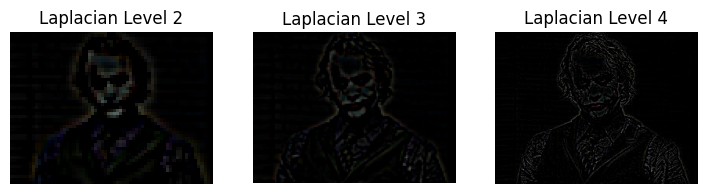

In [ ]:
plt.figure(figsize=(12, 6))

# Display the Laplacian pyramid levels
for i in range(1,num_levels):
    plt.subplot(1, num_levels, i )
    plt.imshow(laplacian_pyramid[i])
    plt.title(f'Laplacian Level {i + 1}')
    plt.axis('off')

plt.show()

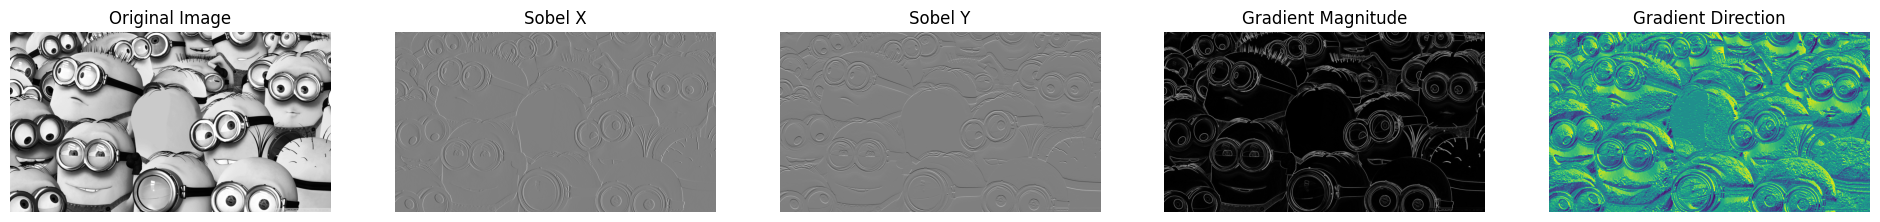

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an example image
image_path = '1.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply the Sobel filter
sobel_x = cv2.Sobel(original_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(original_image, cv2.CV_64F, 0, 1, ksize=3)

# Compute the magnitude and direction of gradients
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
direction = np.arctan2(sobel_y, sobel_x)

# Display the results
plt.figure(figsize=(24, 15))

plt.subplot(1, 5, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(direction)
plt.title('Gradient Direction')
plt.axis('off')

plt.show()


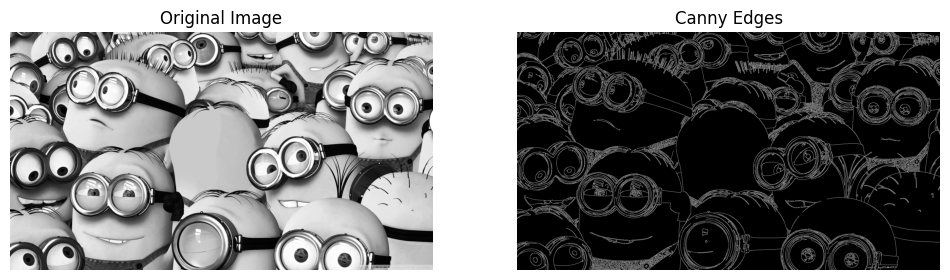

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load an example image
image_path = '1.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply the Canny edge detector
edges = cv2.Canny(original_image, 50, 150)  # Adjust the thresholds as needed

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.show()


In [ ]:
from random import randint

from math import log
numbers = [randint(0, 1024) for i in range(10)]

print(numbers)
print("Log 2:", [log(i, 2) for i in numbers])
print("2 üssü:", [2 ** i for i in [log(i, 2) for i in numbers]])


[716, 899, 603, 427, 55, 533, 742, 433, 802, 38]
Log 2: [9.483815777264256, 9.812177305514448, 9.236014191900086, 8.73809225962049, 5.78135971352466, 9.057991722759176, 9.535275376620804, 8.758223214726724, 9.647458426454921, 5.247927513443585]
2 üssü: [716.0, 899.0000000000002, 603.0000000000005, 427.0, 55.000000000000014, 533.0000000000002, 742.0000000000005, 432.9999999999999, 802.0000000000007, 37.99999999999999]


# All Functions

In [ ]:
def rgb_to_bgr(rgb_array):
    bgr_array = rgb_array[:, :, ::-1]
    return (bgr_array)

def show_gaussian_smoothing(sigma_list, ksize):
  for j in range(1,len(files)+1):
    original_image = plt_image.imread(str(j) + ".jpg")
    # Apply Gaussian blur with different sigma values


    plt.figure(figsize=(15,10))
    kernel_size = (ksize, ksize)

    # Display the original image
    plt.subplot(1, len(sigma_list) + 1,1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    for i, sigma in enumerate(sigma_list, 1):
        # Blur the image
        blur = cv2.GaussianBlur(original_image, kernel_size, sigma)


        # Display the original and blurred images
        plt.subplot(1, len(sigma_list) + 1, i+1)
        plt.imshow(blur)
        plt.title(f'Sigma: {sigma}')
        plt.axis('off')


    plt.show()

def show_median_smoothing(median_kernel_sizes):
  for j in range(1,len(files)+1):
    original_image = plt_image.imread(str(j) + ".jpg")
    # Apply Gaussian blur with different sigma values


    plt.figure(figsize=(15,10))



    # Display the original image
    plt.subplot(1, len(median_kernel_sizes) + 1,1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    for i, kernel_size in enumerate(median_kernel_sizes, 1):
        # Blur the image
        median_image = cv2.medianBlur(original_image, kernel_size)


        # Display the original and blurred images
        plt.subplot(1, len(median_kernel_sizes) + 1, i+1)
        plt.imshow(median_image)
        plt.title(f'Kernel Size : {kernel_size}')
        plt.axis('off')


    plt.show()

def show_convolved_image(sigma_list, blur_sigma = 21, kernel_size = (21, 21), scope =2):

  for j in range(1,len(files)+1):


    blur_sigma = blur_sigma
    original_image = plt_image.imread(str(j) + ".jpg")
    blur = cv2.GaussianBlur(original_image, kernel_size,  blur_sigma)



    plt.figure(figsize=(15,10))

    # Display the original image
    plt.subplot(1, len(sigma_list) + 1,1)
    plt.imshow(blur)
    plt.title('Blurred Image')
    plt.axis('off')

    for i, sigma in enumerate(sigma_list, 1):
      dog_kernel = cv2.GaussianBlur(blur, kernel_size, scope) - cv2.GaussianBlur(blur, kernel_size, sigma)
      cnv = dog_kernel * original_image



      # Display the original and blurred images
      plt.subplot(1, len(sigma_list) + 1, i+1)
      plt.imshow(cnv)
      plt.title(f'Sigma Difference: {round(scope-sigma,2)}')
      plt.axis('off')


    plt.show()

def thresholding(original_image,blur_sigma,blur_kernel_size, scope, Ksigma,epsilon):
  blur = cv2.GaussianBlur(original_image, blur_kernel_size,  blur_sigma)

  dog_kernel = cv2.GaussianBlur(blur, blur_kernel_size, scope) - cv2.GaussianBlur(blur, blur_kernel_size, Ksigma)
  cnv = dog_kernel * original_image

  cnv = dog_kernel

  cv2.imwrite('temp.jpg', cnv)

  temp_image = cv2.imread('temp.jpg',cv2.IMREAD_GRAYSCALE)
  gray_image = cv2.cvtColor(temp_image, cv2.IMREAD_GRAYSCALE)

  # Thresholded Image
  thresholded_image = gray_image.copy()

  thresholded_image[gray_image < epsilon] = 0    # Black
  thresholded_image[gray_image >= epsilon] =  255 # White

  try:
    os.remove('temp.jpg')
  except:
    pass

  return thresholded_image

def show_thresholded_image(epsilon_list,blur_sigma = 50,blur_kernel_size = (21, 21), scope = 2.0, Ksigma= 2.3):

  for j in range(1,len(files)+1):
    plt.figure(figsize=(15,10))

    original_image = plt_image.imread(str(j) + ".jpg")


    # Display the original image
    plt.subplot(1, len(epsilon_list) + 1,1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    for i, epsilon in enumerate(epsilon_list, 1):

      thresholded_image = thresholding(original_image,blur_sigma ,blur_kernel_size , scope , Ksigma , epsilon = epsilon)


      # Display the original and blurred images
      plt.subplot(1, len(epsilon_list) + 1, i+1)
      plt.imshow(thresholded_image)
      plt.title(f'Thresholded With E : {round(epsilon,2)}')
      plt.axis('off')



    plt.show()


def sobel_edge_detection(image, kernel_size):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Sobel operator in the x and y directions
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel_size)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel_size)

    # Compute the magnitude of the gradient
    magnitude = np.sqrt(sobelx**2 + sobely**2)

    # Normalize the magnitude to the range [0, 255]
    magnitude = np.uint8(255 * magnitude / np.max(magnitude))

    return magnitude

def show_sobeled_images(kernel_sizes):



  for j in range(1,len(files)+1):
    original_image = plt_image.imread(str(j)+ ".jpg")

    plt.figure(figsize=(15,10))

    # Display the original image
    plt.subplot(1, len(kernel_sizes) + 1, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    for i, size in enumerate(kernel_sizes, 1):

      detected = sobel_edge_detection(original_image, size)



      # Display the original and blurred images
      plt.subplot(1, len(kernel_sizes) + 1, i+1)
      plt.imshow(detected, cmap = "gray")
      plt.title(f'Sobel with KSize: {round(size)}')
      plt.axis('off')



    plt.show()


def edge_detection_canny(image, low_threshold, high_threshold, size):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and help edge detection
    blurred = cv2.GaussianBlur(gray, (size, size), 0)

    # Apply Canny edge detector
    edges = cv2.Canny(blurred, low_threshold, high_threshold)

    return edges

def show_cannied_image(kernel_sizes):

  for j in range(1,len(files)+1):

    original_image = plt_image.imread(str(j)+ ".jpg")

    plt.figure(figsize=(15,10))

    # Display the original image
    plt.subplot(1, len(kernel_sizes) + 1, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    for i, size in enumerate(kernel_sizes, 1):

      detected = edge_detection_canny(original_image, 50, 51, size)

      # Display the original and blurred images
      plt.subplot(1, len(kernel_sizes) + 1, i+1)
      plt.imshow(detected, cmap = "gray")
      plt.title(f'Canny with KSize: {round(size)}')
      plt.axis('off')



    plt.show()


def quantized (original_image , divider):
    temp = original_image//divider
    quantized_image = temp * divider

    return quantized_image


def show_RGBquantized_images(dividers):
  for j in range(1,len(files)+1):

    original_image = plt_image.imread(str(j)+ ".jpg")
    x = 256


    plt.figure(figsize=(15,10))

    # Display the original image
    plt.subplot(1, len(dividers) + 1,1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    for i, divider in enumerate(dividers, 1):


      quantized_image = quantized(original_image , divider)


      # Display the original and blurred images
      plt.subplot(1, len(dividers) + 1, i+1)
      plt.imshow(quantized_image)
      plt.title(f'Quantized With : {divider}')
      plt.axis('off')



    plt.show()


def quantize_lab_simple(image, factor):
    # Convert the image to Lab color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

    # Round the Lab values
    # Quantize each channel
    lab_image = (lab_image// factor) * factor
    #lab_image[:,:,0] = np.floor(lab_image[:,:,0] // (factor)) * (factor)
    #lab_image[:,:,1] = np.floor(lab_image[:,:,1] // (factor)) * (factor)
    #lab_image[:,:,2] = np.floor(lab_image[:,:,2] // (factor)) * (factor)

    # Convert the quantized Lab image back to BGR color space
    quantized_image = cv2.cvtColor(lab_image, cv2.COLOR_Lab2BGR)

    return quantized_image

def show_LABquantized_images(factors):
  for j in range(1,len(files)+1):

    original_image = plt_image.imread(str(j)+ ".jpg")


    plt.figure(figsize=(15,10))

    # Display the original image
    plt.subplot(1, len(factors) + 1, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    for i, factor in enumerate(factors, 1):

      quantized_image = quantize_lab_simple(original_image, factor)

      # Display the original and blurred images
      plt.subplot(1, len(factors) + 1, i+1)
      plt.imshow(quantized_image)
      plt.title(f'Quantized LAB : {round(factor)}')
      plt.axis('off')



    plt.show()


def quantize_hsv(image, factor):
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv_image = (hsv_image // factor) * factor
    # Round the HSV values
    #hsv_image[:, :, 0] = np.round(hsv_image[:, :, 0] // factor) * factor
    #hsv_image[:, :, 1] = np.round(hsv_image[:, :, 1] // factor) * factor
    #hsv_image[:, :, 2] = np.round(hsv_image[:, :, 2] // factor) * factor


    # Convert the quantized HSV image back to BGR color space
    quantized_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

    return quantized_image


def show_HSVquantized_images(factors):

  for j in range(1,len(files)+1):

    original_image = plt_image.imread(str(j)+ ".jpg")


    plt.figure(figsize=(15,10))

    # Display the original image
    plt.subplot(1, len(factors) + 1, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    for i, factor in enumerate(factors, 1):

      quantized_image = quantize_hsv(original_image, factor)



      # Display the original and blurred images
      plt.subplot(1, len(factors) + 1, i+1)
      plt.imshow(quantized_image)
      plt.title(f'Quantized HSV : {round(factor)}')
      plt.axis('off')



    plt.show()


In [ ]:
def show_results(blur_sigma, scope, Ksize,Ksigma, epsilon ,divider):

  for i in range(1,len(files)+1):
    original_image = plt_image.imread(str(i) + ".jpg") #BGR

    blurred_image = cv2.GaussianBlur(original_image, (Ksize,Ksize), blur_sigma)

    plt.figure(figsize=(12,8))


    plt.subplot(1, 2 , 1)
    plt.imshow(original_image)
    plt.axis('off')



    thresholded_image = thresholding(blurred_image, blur_sigma = blur_sigma ,blur_kernel_size = (Ksize, Ksize), scope = scope, Ksigma= Ksigma, epsilon = epsilon)
    quantized_image = quantized(original_image , divider)
    inversed_image = (255 - thresholded_image[:,:,:3])
    inversed_image_divided = inversed_image // 255
    result = (quantized_image) * inversed_image_divided

    plt.subplot(1, 2 , 2)
    plt.imshow(result)
    plt.axis('off')


    plt.show()



In [ ]:
def show_combined_results(blur_sigma,blur_factor, scope, Ksize,Ksigma, epsilon ):

  for i in range(1,len(files)+1):
    original_image = plt_image.imread(str(i) + ".jpg") #BGR

    blurred_image = cv2.GaussianBlur(original_image, (blur_factor,blur_factor), blur_sigma)
    thresholded_image = thresholding(original_image, blur_sigma = blur_sigma ,blur_kernel_size = (blur_factor, blur_factor), scope = scope, Ksigma= Ksigma, epsilon = epsilon)
    quantized_image = quantized(blurred_image , divider = 32)
    inversed_image = (255 - thresholded_image[:,:,:3])
    inversed_image_divided = inversed_image // 255
    result = (quantized_image) * inversed_image_divided

    plt.figure(figsize=(15,10))

    plt.subplot(1, 5 , 1)
    plt.imshow(original_image)
    plt.title('Original-Image')
    plt.axis('off')



    plt.subplot(1, 5 , 2)
    plt.imshow(result)
    plt.title('Original-Original')
    plt.axis('off')

    thresholded_image = thresholding(blurred_image, blur_sigma = blur_sigma ,blur_kernel_size = (blur_factor, blur_factor), scope = scope, Ksigma= Ksigma, epsilon = epsilon)
    quantized_image = quantized(blurred_image , divider = 32)
    inversed_image = (255 - thresholded_image[:,:,:3])
    inversed_image_divided = inversed_image // 255
    result = (quantized_image) * inversed_image_divided


    plt.subplot(1, 5 , 3)
    plt.imshow(result)
    plt.title('Blurred-Blurred')
    plt.axis('off')

    thresholded_image = thresholding(original_image, blur_sigma = blur_sigma ,blur_kernel_size = (blur_factor, blur_factor), scope = scope, Ksigma= Ksigma, epsilon = epsilon)
    quantized_image = quantized(blurred_image , divider = 32)
    inversed_image = (255 - thresholded_image[:,:,:3])
    inversed_image_divided = inversed_image // 255
    result = (quantized_image) * inversed_image_divided

    plt.subplot(1, 5 , 4)
    plt.imshow( result)
    plt.title('Original-Blur')
    plt.axis('off')

    thresholded_image = thresholding(blurred_image, blur_sigma = blur_sigma ,blur_kernel_size = (blur_factor, blur_factor), scope = scope, Ksigma= Ksigma, epsilon = epsilon)
    quantized_image = quantized(original_image , divider = 32)
    inversed_image = (255 - thresholded_image[:,:,:3])
    inversed_image_divided = inversed_image // 255
    result = (quantized_image) * inversed_image_divided

    plt.subplot(1, 5 , 5)
    plt.imshow(result)
    plt.title('Blurred-Original')
    plt.axis('off')


    plt.show()

# Image Smoothing

## Gaussian

Smoothing for different sigma values and kernel sizes


In [ ]:
#show_gaussian_smoothing([3, 25, 90], ksize = 21)

## Trying Median Filtering To See Differences

In [ ]:
#show_median_smoothing( [3, 7, 21, 57])

# Edge Detection

Take difference of two Gaussed Image

## Show Image That Convolved With DoG and Original Image

In [ ]:
#show_convolved_image([2.1, 2.5, 5, 10], blur_sigma=21)

## Showing Thresholded Image

In [ ]:
#show_thresholded_image([5, 30 ,60, 120], blur_sigma = 3)

## Edge Detection With Sobel Filter To Show Differences

In [ ]:
#show_sobeled_images( [1, 7, 17, 27])

## Edge Detection With Canny To Show Differences

In [ ]:
#show_cannied_image( [1, 7, 17, 27])

# Image Quantization

## Quantization With RGB Values

In [ ]:
#show_RGBquantized_images([8, 32, 64, 128])

## Quantization With LAB Values

In [ ]:
#show_LABquantized_images([16, 32, 64, 128])

## Quantization With HSV Values

In [ ]:
#show_HSVquantized_images([16, 32, 64, 128])

## Combining Edge and Quantized Image

In [ ]:
#show_combined_results(blur_sigma = 51,blur_factor = 51,Ksize = 51, scope = 2 , Ksigma = 2.5 , epsilon = 75 )

In [ ]:
#show_results(blur_sigma = 2 ,Ksize = 5 , scope = 1.3 , Ksigma = 3.1 ,epsilon = 15 , divider = 32)

In [ ]:
# -*- coding: utf-8 -*-
"""ASG1.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1ym_RCsz5JCeGlnBGnRKMkWEazDbl0ZVU
"""

import os
import scipy.ndimage
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
import cv2
import PIL
from PIL import Image
from matplotlib import image as plt_image


from google.colab import drive

drive.mount('/content/drive') # Connecting to drive

"""# Changing directory and listing files"""

# Get the current directory (the directory where your Python script is located)
current_directory = os.getcwd()
print(current_directory)

# Specify the path to the directory you want to change to
folder_path = "/content/drive/MyDrive/Colab Notebooks/415ASG1/Photos"


# Change the current working directory to the new directory
os.chdir(folder_path)

# Get the current directory (the directory where your Python script is located)
current_directory = os.getcwd()
print(current_directory)

files = os.listdir(current_directory)

# Print the list of files
for file in files:
    print(file)

"""# Changing File Names"""

# Check if the folder path exists
if os.path.exists(folder_path):
    # List all files in the folder
    files = os.listdir(folder_path)
    ind = 1

    # Enumerate through the files and rename them
    for index, file in enumerate(files):
        # Generate the new file name with enumeration
        new_name = f"{ind}.jpg"
        ind+=1
        # Build the full paths for the old and new names
        old_path = os.path.join(folder_path, file)
        new_path = os.path.join(folder_path, new_name)

        # Rename the file
        os.rename(old_path, new_path)

        print(f"Renamed: {file} -> {new_name}")

else:
    print(f"The folder path '{folder_path}' does not exist.")

"""# All Functions"""

def rgb_to_bgr(rgb_array):
    bgr_array = rgb_array[:, :, ::-1]
    return (bgr_array)

def show_gaussian_smoothing(sigma_list, ksize):
  for j in range(1,len(files)+1):
    original_image = plt_image.imread(str(j) + ".jpg")
    # Apply Gaussian blur with different sigma values


    plt.figure(figsize=(15,10))
    kernel_size = (ksize, ksize)

    # Display the original image
    plt.subplot(1, len(sigma_list) + 1,1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    for i, sigma in enumerate(sigma_list, 1):
        # Blur the image
        blur = cv2.GaussianBlur(original_image, kernel_size, sigma)


        # Display the original and blurred images
        plt.subplot(1, len(sigma_list) + 1, i+1)
        plt.imshow(blur)
        plt.title(f'Sigma: {sigma}')
        plt.axis('off')


    plt.show()

def show_median_smoothing(median_kernel_sizes):
  for j in range(1,len(files)+1):
    original_image = plt_image.imread(str(j) + ".jpg")
    # Apply Gaussian blur with different sigma values


    plt.figure(figsize=(15,10))



    # Display the original image
    plt.subplot(1, len(median_kernel_sizes) + 1,1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    for i, kernel_size in enumerate(median_kernel_sizes, 1):
        # Blur the image
        median_image = cv2.medianBlur(original_image, kernel_size)


        # Display the original and blurred images
        plt.subplot(1, len(median_kernel_sizes) + 1, i+1)
        plt.imshow(median_image)
        plt.title(f'Kernel Size : {kernel_size}')
        plt.axis('off')


    plt.show()

def show_convolved_image(sigma_list, blur_sigma = 21, kernel_size = (21, 21), scope =2):

  for j in range(1,len(files)+1):


    blur_sigma = blur_sigma
    original_image = plt_image.imread(str(j) + ".jpg")
    blur = cv2.GaussianBlur(original_image, kernel_size,  blur_sigma)



    plt.figure(figsize=(15,10))

    # Display the original image
    plt.subplot(1, len(sigma_list) + 1,1)
    plt.imshow(blur)
    plt.title('Blurred Image')
    plt.axis('off')

    for i, sigma in enumerate(sigma_list, 1):
      dog_kernel = cv2.GaussianBlur(blur, kernel_size, scope) - cv2.GaussianBlur(blur, kernel_size, sigma)
      cnv = dog_kernel * original_image



      # Display the original and blurred images
      plt.subplot(1, len(sigma_list) + 1, i+1)
      plt.imshow(cnv)
      plt.title(f'Sigma Difference: {round(scope-sigma,2)}')
      plt.axis('off')


    plt.show()

def thresholding(original_image,blur_sigma,blur_kernel_size, scope, Ksigma,epsilon):
  blur = cv2.GaussianBlur(original_image, blur_kernel_size,  blur_sigma)

  dog_kernel = cv2.GaussianBlur(blur, blur_kernel_size, scope) - cv2.GaussianBlur(blur, blur_kernel_size, Ksigma)
  cnv = dog_kernel * original_image

  cnv = dog_kernel

  cv2.imwrite('temp.jpg', cnv)

  temp_image = cv2.imread('temp.jpg',cv2.IMREAD_GRAYSCALE)
  gray_image = cv2.cvtColor(temp_image, cv2.IMREAD_GRAYSCALE)

  # Thresholded Image
  thresholded_image = gray_image.copy()

  thresholded_image[gray_image < epsilon] = 0    # Black
  thresholded_image[gray_image >= epsilon] =  255 # White

  try:
    os.remove('temp.jpg')
  except:
    pass

  return thresholded_image

def show_thresholded_image(epsilon_list,blur_sigma = 50,blur_kernel_size = (21, 21), scope = 2.0, Ksigma= 2.3):

  for j in range(1,len(files)+1):
    plt.figure(figsize=(15,10))

    original_image = plt_image.imread(str(j) + ".jpg")


    # Display the original image
    plt.subplot(1, len(epsilon_list) + 1,1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    for i, epsilon in enumerate(epsilon_list, 1):

      thresholded_image = thresholding(original_image,blur_sigma ,blur_kernel_size , scope , Ksigma , epsilon = epsilon)


      # Display the original and blurred images
      plt.subplot(1, len(epsilon_list) + 1, i+1)
      plt.imshow(thresholded_image)
      plt.title(f'Thresholded With E : {round(epsilon,2)}')
      plt.axis('off')



    plt.show()


def sobel_edge_detection(image, kernel_size):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Sobel operator in the x and y directions
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel_size)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel_size)

    # Compute the magnitude of the gradient
    magnitude = np.sqrt(sobelx**2 + sobely**2)

    # Normalize the magnitude to the range [0, 255]
    magnitude = np.uint8(255 * magnitude / np.max(magnitude))

    return magnitude

def show_sobeled_images(kernel_sizes):



  for j in range(1,len(files)+1):
    original_image = plt_image.imread(str(j)+ ".jpg")

    plt.figure(figsize=(15,10))

    # Display the original image
    plt.subplot(1, len(kernel_sizes) + 1, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    for i, size in enumerate(kernel_sizes, 1):

      detected = sobel_edge_detection(original_image, size)



      # Display the original and blurred images
      plt.subplot(1, len(kernel_sizes) + 1, i+1)
      plt.imshow(detected, cmap = "gray")
      plt.title(f'Sobel with KSize: {round(size)}')
      plt.axis('off')



    plt.show()


def edge_detection_canny(image, low_threshold, high_threshold, size):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and help edge detection
    blurred = cv2.GaussianBlur(gray, (size, size), 0)

    # Apply Canny edge detector
    edges = cv2.Canny(blurred, low_threshold, high_threshold)

    return edges

def show_cannied_image(kernel_sizes):

  for j in range(1,len(files)+1):

    original_image = plt_image.imread(str(j)+ ".jpg")

    plt.figure(figsize=(15,10))

    # Display the original image
    plt.subplot(1, len(kernel_sizes) + 1, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    for i, size in enumerate(kernel_sizes, 1):

      detected = edge_detection_canny(original_image, 50, 51, size)

      # Display the original and blurred images
      plt.subplot(1, len(kernel_sizes) + 1, i+1)
      plt.imshow(detected, cmap = "gray")
      plt.title(f'Canny with KSize: {round(size)}')
      plt.axis('off')



    plt.show()


def quantized (original_image , divider):
    temp = original_image//divider
    quantized_image = temp * divider

    return quantized_image


def show_RGBquantized_images(dividers):
  for j in range(1,len(files)+1):

    original_image = plt_image.imread(str(j)+ ".jpg")
    x = 256


    plt.figure(figsize=(15,10))

    # Display the original image
    plt.subplot(1, len(dividers) + 1,1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    for i, divider in enumerate(dividers, 1):


      quantized_image = quantized(original_image , divider)


      # Display the original and blurred images
      plt.subplot(1, len(dividers) + 1, i+1)
      plt.imshow(quantized_image)
      plt.title(f'Quantized With : {divider}')
      plt.axis('off')



    plt.show()


def quantize_lab_simple(image, factor):
    # Convert the image to Lab color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

    # Round the Lab values
    # Quantize each channel
    lab_image = (lab_image// factor) * factor
    #lab_image[:,:,0] = np.floor(lab_image[:,:,0] // (factor)) * (factor)
    #lab_image[:,:,1] = np.floor(lab_image[:,:,1] // (factor)) * (factor)
    #lab_image[:,:,2] = np.floor(lab_image[:,:,2] // (factor)) * (factor)

    # Convert the quantized Lab image back to BGR color space
    quantized_image = cv2.cvtColor(lab_image, cv2.COLOR_Lab2BGR)

    return quantized_image

def show_LABquantized_images(factors):
  for j in range(1,len(files)+1):

    original_image = plt_image.imread(str(j)+ ".jpg")


    plt.figure(figsize=(15,10))

    # Display the original image
    plt.subplot(1, len(factors) + 1, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    for i, factor in enumerate(factors, 1):

      quantized_image = quantize_lab_simple(original_image, factor)

      # Display the original and blurred images
      plt.subplot(1, len(factors) + 1, i+1)
      plt.imshow(quantized_image)
      plt.title(f'Quantized LAB : {round(factor)}')
      plt.axis('off')



    plt.show()


def quantize_hsv(image, factor):
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv_image = (hsv_image // factor) * factor
    # Round the HSV values
    #hsv_image[:, :, 0] = np.round(hsv_image[:, :, 0] // factor) * factor
    #hsv_image[:, :, 1] = np.round(hsv_image[:, :, 1] // factor) * factor
    #hsv_image[:, :, 2] = np.round(hsv_image[:, :, 2] // factor) * factor


    # Convert the quantized HSV image back to BGR color space
    quantized_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

    return quantized_image


def show_HSVquantized_images(factors):

  for j in range(1,len(files)+1):

    original_image = plt_image.imread(str(j)+ ".jpg")


    plt.figure(figsize=(15,10))

    # Display the original image
    plt.subplot(1, len(factors) + 1, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    for i, factor in enumerate(factors, 1):

      quantized_image = quantize_hsv(original_image, factor)



      # Display the original and blurred images
      plt.subplot(1, len(factors) + 1, i+1)
      plt.imshow(quantized_image)
      plt.title(f'Quantized HSV : {round(factor)}')
      plt.axis('off')



    plt.show()

def show_results(blur_sigma, scope, Ksize,Ksigma, epsilon ,divider):

  for i in range(1,len(files)+1):
    original_image = plt_image.imread(str(i) + ".jpg") #BGR

    blurred_image = cv2.GaussianBlur(original_image, (Ksize,Ksize), blur_sigma)

    plt.figure(figsize=(12,8))


    plt.subplot(1, 2 , 1)
    plt.imshow(original_image)
    plt.axis('off')



    thresholded_image = thresholding(blurred_image, blur_sigma = blur_sigma ,blur_kernel_size = (Ksize, Ksize), scope = scope, Ksigma= Ksigma, epsilon = epsilon)
    quantized_image = quantized(original_image , divider)
    inversed_image = (255 - thresholded_image[:,:,:3])
    inversed_image_divided = inversed_image // 255
    result = (quantized_image) * inversed_image_divided

    plt.subplot(1, 2 , 2)
    plt.imshow(result)
    plt.axis('off')


    plt.show()

def show_combined_results(blur_sigma,blur_factor, scope, Ksize,Ksigma, epsilon ):

  for i in range(1,len(files)+1):
    original_image = plt_image.imread(str(i) + ".jpg") #BGR

    blurred_image = cv2.GaussianBlur(original_image, (blur_factor,blur_factor), blur_sigma)
    thresholded_image = thresholding(original_image, blur_sigma = blur_sigma ,blur_kernel_size = (blur_factor, blur_factor), scope = scope, Ksigma= Ksigma, epsilon = epsilon)
    quantized_image = quantized(blurred_image , divider = 32)
    inversed_image = (255 - thresholded_image[:,:,:3])
    inversed_image_divided = inversed_image // 255
    result = (quantized_image) * inversed_image_divided

    plt.figure(figsize=(15,10))

    plt.subplot(1, 5 , 1)
    plt.imshow(original_image)
    plt.title('Original-Image')
    plt.axis('off')



    plt.subplot(1, 5 , 2)
    plt.imshow(result)
    plt.title('Original-Original')
    plt.axis('off')

    thresholded_image = thresholding(blurred_image, blur_sigma = blur_sigma ,blur_kernel_size = (blur_factor, blur_factor), scope = scope, Ksigma= Ksigma, epsilon = epsilon)
    quantized_image = quantized(blurred_image , divider = 32)
    inversed_image = (255 - thresholded_image[:,:,:3])
    inversed_image_divided = inversed_image // 255
    result = (quantized_image) * inversed_image_divided


    plt.subplot(1, 5 , 3)
    plt.imshow(result)
    plt.title('Blurred-Blurred')
    plt.axis('off')

    thresholded_image = thresholding(original_image, blur_sigma = blur_sigma ,blur_kernel_size = (blur_factor, blur_factor), scope = scope, Ksigma= Ksigma, epsilon = epsilon)
    quantized_image = quantized(blurred_image , divider = 32)
    inversed_image = (255 - thresholded_image[:,:,:3])
    inversed_image_divided = inversed_image // 255
    result = (quantized_image) * inversed_image_divided

    plt.subplot(1, 5 , 4)
    plt.imshow( result)
    plt.title('Original-Blur')
    plt.axis('off')

    thresholded_image = thresholding(blurred_image, blur_sigma = blur_sigma ,blur_kernel_size = (blur_factor, blur_factor), scope = scope, Ksigma= Ksigma, epsilon = epsilon)
    quantized_image = quantized(original_image , divider = 32)
    inversed_image = (255 - thresholded_image[:,:,:3])
    inversed_image_divided = inversed_image // 255
    result = (quantized_image) * inversed_image_divided

    plt.subplot(1, 5 , 5)
    plt.imshow(result)
    plt.title('Blurred-Original')
    plt.axis('off')


    plt.show()

"""# Image Smoothing

## Gaussian

Smoothing for different sigma values and kernel sizes
"""

#show_gaussian_smoothing([3, 25, 90], ksize = 21)

"""## Trying Median Filtering To See Differences"""

#show_median_smoothing( [3, 7, 21, 57])

"""# Edge Detection

Take difference of two Gaussed Image

## Show Image That Convolved With DoG and Original Image
"""

#show_convolved_image([2.1, 2.5, 5, 10], blur_sigma=21)

"""## Showing Thresholded Image"""

#show_thresholded_image([5, 30 ,60, 120], blur_sigma = 3)

"""## Edge Detection With Sobel Filter To Show Differences"""

#show_sobeled_images( [1, 7, 17, 27])

"""## Edge Detection With Canny To Show Differences"""

#show_cannied_image( [1, 7, 17, 27])

"""# Image Quantization

## Quantization With RGB Values
"""

#show_RGBquantized_images([8, 32, 64, 128])

"""## Quantization With LAB Values"""

#show_LABquantized_images([16, 32, 64, 128])

"""## Quantization With HSV Values"""

#show_HSVquantized_images([16, 32, 64, 128])

"""## Combining Edge and Quantized Image"""

#show_combined_results(blur_sigma = 51,blur_factor = 51,Ksize = 51, scope = 2 , Ksigma = 2.5 , epsilon = 75 )

#show_results(blur_sigma = 2 ,Ksize = 5 , scope = 1.3 , Ksigma = 3.1 ,epsilon = 15 , divider = 32)



Mounted at /content/drive
/content
/content/drive/MyDrive/Colab Notebooks/415ASG1/Photos
1.jpg
2.jpg
3.jpg
4.jpg
5.jpg
6.jpg
Renamed: 1.jpg -> 1.jpg
Renamed: 2.jpg -> 2.jpg
Renamed: 3.jpg -> 3.jpg
Renamed: 4.jpg -> 4.jpg
Renamed: 5.jpg -> 5.jpg
Renamed: 6.jpg -> 6.jpg


'## Combining Edge and Quantized Image'

In [ ]:
show_results(blur_sigma = 2 ,Ksize = 5 , scope = 1.3 , Ksigma = 3.1 ,epsilon = 15 , divider = 32)



Output hidden; open in https://colab.research.google.com to view.